# Assignment 4 
##### (MT21MCS013 Jay - Assignment 4 on SVM, DT, NN, and RF)
Letter Recognition - http://archive.ics.uci.edu/ml/machine-learning-databases/letter-recognition/

German Data - https://archive.ics.uci.edu/ml/machine-learning-databases/statlog/german/german.data

Wine Quality - https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/

Student - https://archive.ics.uci.edu/ml/machine-learning-databases/00320/

### Importing libs

In [40]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from mlxtend.plotting import plot_confusion_matrix
from sklearn import tree
import graphviz 
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OrdinalEncoder
import warnings
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier

In [41]:
warnings.filterwarnings('ignore')

## Statistics

In [24]:
def Statistics(name,dataSet) :
    print('\033[1m' + '\n\nStatistics for '  + name + '\033[0m')
    print(dataSet.describe(include='all'))
    print('\033[1m' + "Median" + '\033[0m' ,dataSet.median(),sep="\n")
    print('\033[1m' + "Mode" + '\033[0m' ,dataSet.mode(),sep="\n")
    print('\033[1m' + "Variance" + '\033[0m' ,dataSet.var(),sep="\n")
    print('\033[1m' + "Skewness" + '\033[0m' ,dataSet.skew(),sep="\n")
    print('\033[1m' + "Kurtosis" + '\033[0m' ,dataSet.kurtosis(),sep="\n")

## Confusion Matrix

In [4]:
r,c = 4,4

In [42]:
def confusionMatrix(y_test,y_predict) :
    conf_matrix = confusion_matrix(y_true=y_test, y_pred=y_predict)
    fig, ax = plot_confusion_matrix(conf_mat=conf_matrix, figsize=(r,c), cmap=plt.cm.Greens)
    plt.xlabel('Predictions', fontsize=18)
    plt.ylabel('Actuals', fontsize=18)
    plt.title('Confusion Matrix', fontsize=18)
    plt.show()

## Support Vector Machine

In [36]:
def SVM(X_train,X_test,y_train,y_test) :
    classifier = svm.SVC(kernel='linear')
    classifier.fit(X_train,y_train)
    y_predict = classifier.predict(X_test)
#     print(classification_report(y_test,y_predict))
    confusionMatrix(y_test,y_predict)

## Decision Tree

In [37]:
def DecisionTree(X_train,X_test,y_train,y_test) :
    clf = tree.DecisionTreeClassifier()
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
#     print(classification_report(y_test,y_predict))
    confusionMatrix(y_test,y_predict)
#     tree.plot_tree(clf)
    dot_data = tree.export_graphviz(clf, out_file=None) 
    graph = graphviz.Source(dot_data) 
    graph.render("Tree")#Export tree as fileName.pdf

## Nearest Neighbour

In [38]:
def NN(X_train,X_test,y_train,y_test) :
    neigh = KNeighborsClassifier(n_neighbors=3)
    neigh.fit(X_train, y_train)
    y_predict = neigh.predict(X_test)
#     print(classification_report(y_test,y_predict))
    confusionMatrix(y_test,y_predict)

## Random Forest

In [39]:
def RandomForest(X_train,X_test,y_train,y_test) :
    clf = RandomForestClassifier(max_depth=64,random_state=0)
    clf.fit(X_train,y_train)
    y_predict = clf.predict(X_test)
    print(classification_report(y_test,y_predict))
    confusionMatrix(y_test,y_predict)

#### Encoding and classifier calls

In [25]:
def doIt(X,Y,name) :
    Statistics(name,X)
    encoder = OrdinalEncoder()
    X = encoder.fit_transform(X)
    Y = encoder.fit_transform(Y)
    X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.3,random_state=4)
    print('\033[1m' + '\n\nSVM' + '\033[0m')
    SVM(X_train,X_test,y_train,y_test)
    print('\033[1m' + '\n\nDecision Tree' + '\033[0m')
    DecisionTree(X_train,X_test,y_train,y_test)
    print('\033[1m' + '\n\nNearest Neighbour' + '\033[0m')
    NN(X_train,X_test,y_train,y_test)
    print('\033[1m' + '\n\nRandom Forest G1' + '\033[0m')
    RandomForest(X_train,X_test,y_train,y_test)

## Letter Recognitition



Statistics forletter_recognition_dataSet
               xbox          ybox         width         high         onpix  \
count  20000.000000  20000.000000  20000.000000  20000.00000  20000.000000   
mean       4.023550      7.035500      5.121850      5.37245      3.505850   
std        1.913212      3.304555      2.014573      2.26139      2.190458   
min        0.000000      0.000000      0.000000      0.00000      0.000000   
25%        3.000000      5.000000      4.000000      4.00000      2.000000   
50%        4.000000      7.000000      5.000000      6.00000      3.000000   
75%        5.000000      9.000000      6.000000      7.00000      5.000000   
max       15.000000     15.000000     15.000000     15.00000     15.000000   

               xbar          ybar         x2bar         y2bar         xybar  \
count  20000.000000  20000.000000  20000.000000  20000.000000  20000.000000   
mean       6.897600      7.500450      4.628600      5.178650      8.282050   
std        2.0260

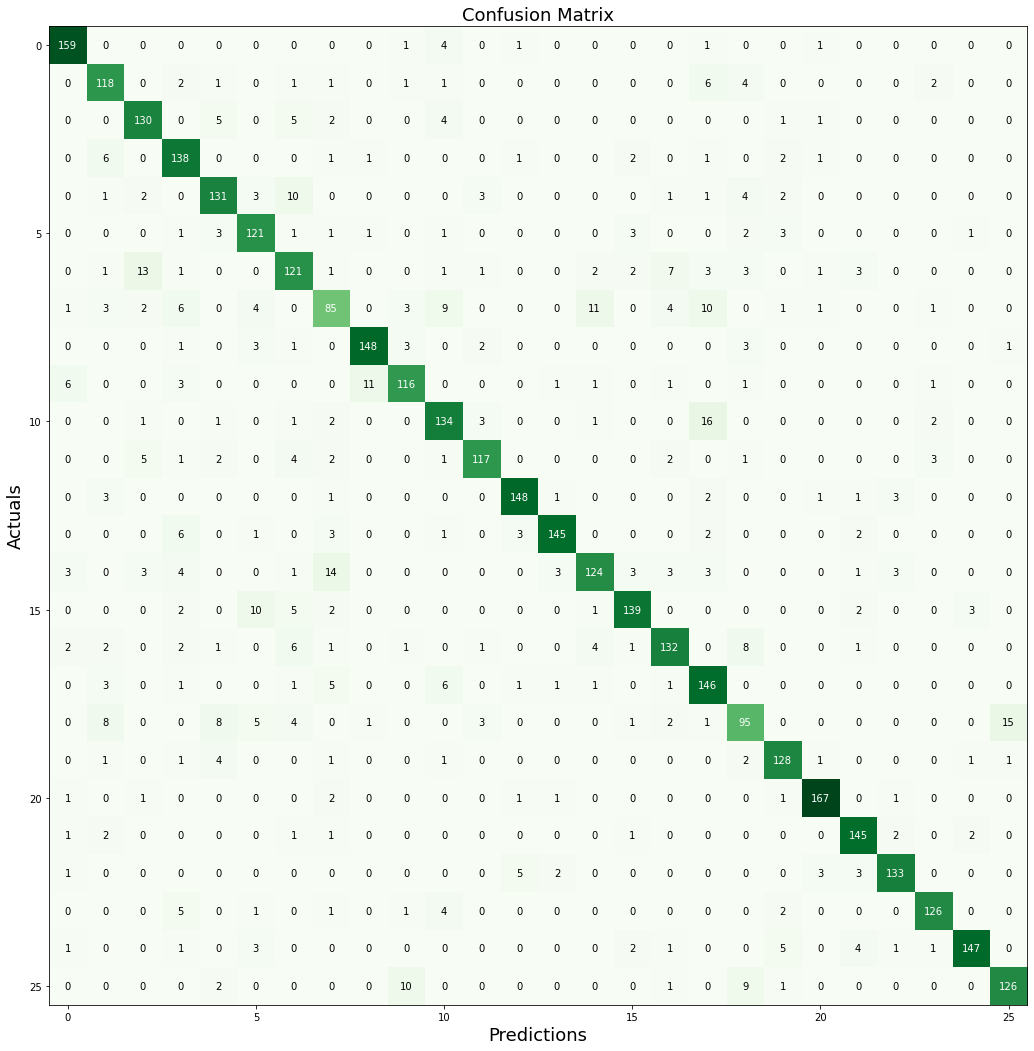



Decision Tree
              precision    recall  f1-score   support

         0.0       0.96      0.92      0.94       167
         1.0       0.86      0.83      0.85       137
         2.0       0.88      0.90      0.89       148
         3.0       0.85      0.90      0.87       153
         4.0       0.88      0.85      0.87       158
         5.0       0.80      0.80      0.80       138
         6.0       0.87      0.84      0.85       160
         7.0       0.78      0.80      0.79       141
         8.0       0.91      0.92      0.91       162
         9.0       0.88      0.90      0.89       141
        10.0       0.87      0.85      0.86       161
        11.0       0.91      0.89      0.90       138
        12.0       0.93      0.88      0.90       160
        13.0       0.93      0.91      0.92       163
        14.0       0.81      0.84      0.83       165
        15.0       0.82      0.90      0.86       164
        16.0       0.87      0.85      0.86       162
        17.

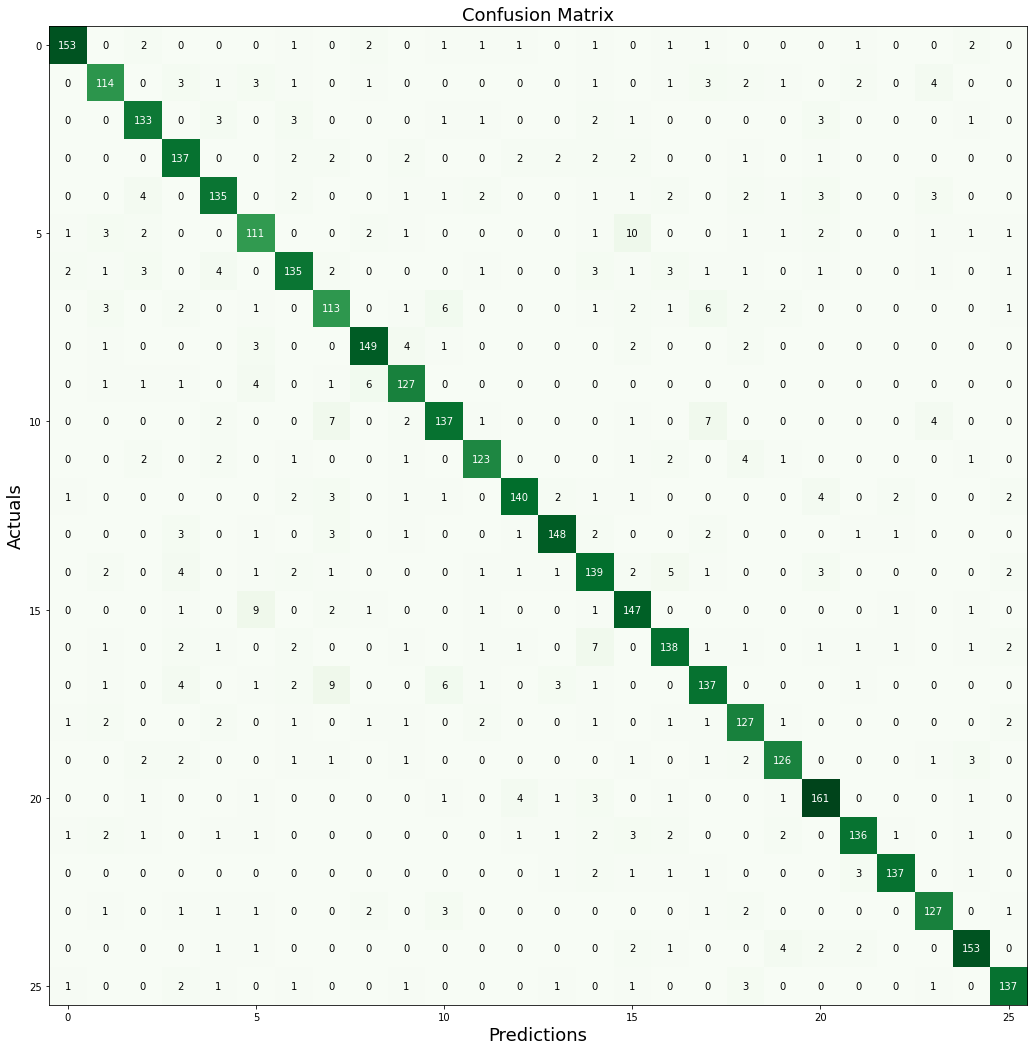



Nearest Neighbour
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       167
         1.0       0.85      0.95      0.90       137
         2.0       0.93      0.99      0.96       148
         3.0       0.92      0.98      0.95       153
         4.0       0.90      0.94      0.92       158
         5.0       0.93      0.95      0.94       138
         6.0       0.97      0.94      0.96       160
         7.0       0.85      0.87      0.86       141
         8.0       0.96      0.97      0.96       162
         9.0       0.94      0.92      0.93       141
        10.0       0.93      0.87      0.90       161
        11.0       0.99      0.98      0.98       138
        12.0       0.99      0.96      0.97       160
        13.0       0.97      0.94      0.96       163
        14.0       0.92      0.97      0.94       165
        15.0       0.97      0.90      0.93       164
        16.0       0.96      0.96      0.96       162
       

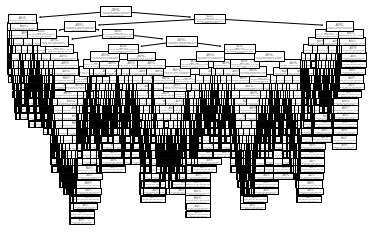

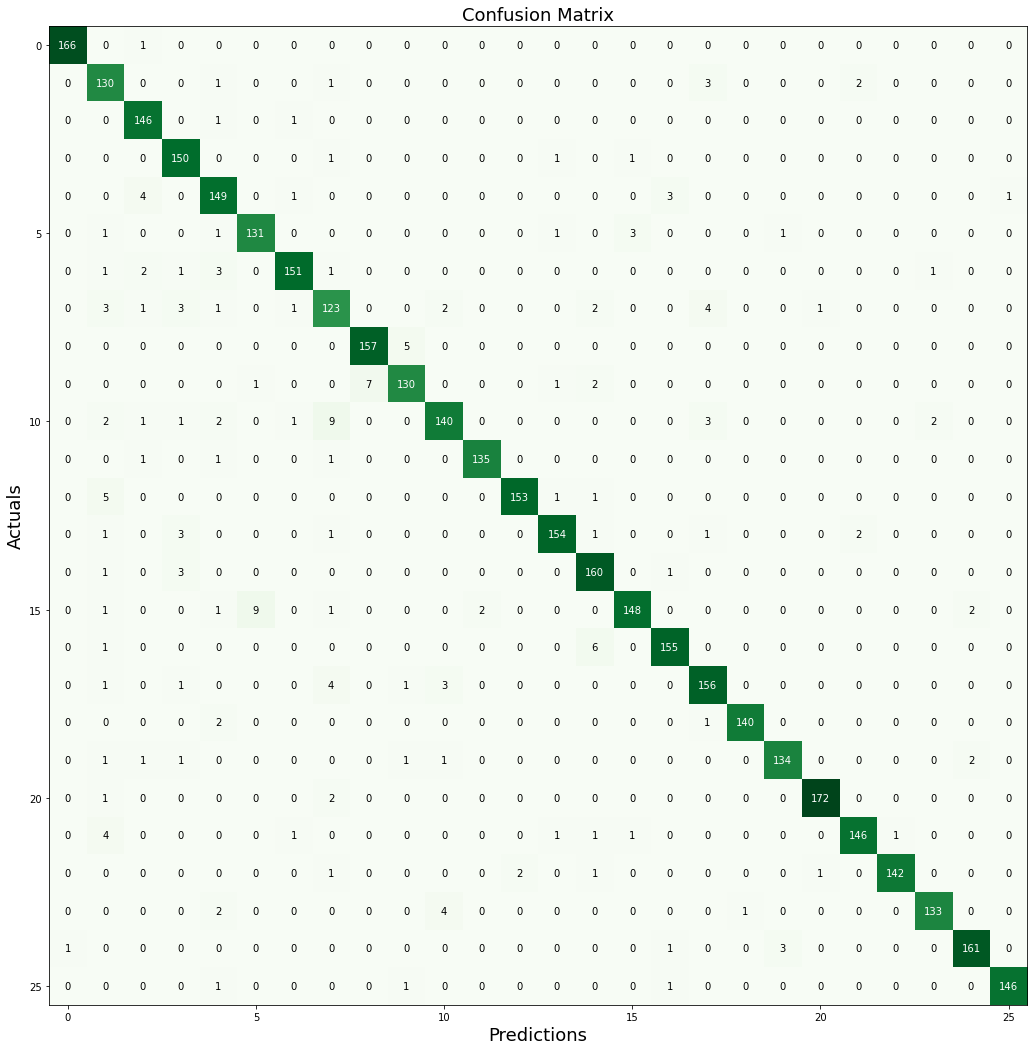



Random Forest G1
              precision    recall  f1-score   support

         0.0       0.99      0.99      0.99       167
         1.0       0.91      0.96      0.94       137
         2.0       0.97      0.96      0.96       148
         3.0       0.95      0.99      0.97       153
         4.0       0.94      0.95      0.95       158
         5.0       0.94      0.96      0.95       138
         6.0       0.95      0.97      0.96       160
         7.0       0.91      0.87      0.89       141
         8.0       0.98      0.95      0.97       162
         9.0       0.97      0.98      0.97       141
        10.0       0.94      0.95      0.94       161
        11.0       1.00      0.92      0.96       138
        12.0       0.96      0.98      0.97       160
        13.0       0.99      0.96      0.98       163
        14.0       0.95      0.94      0.94       165
        15.0       0.96      0.95      0.95       164
        16.0       0.91      0.96      0.93       162
        

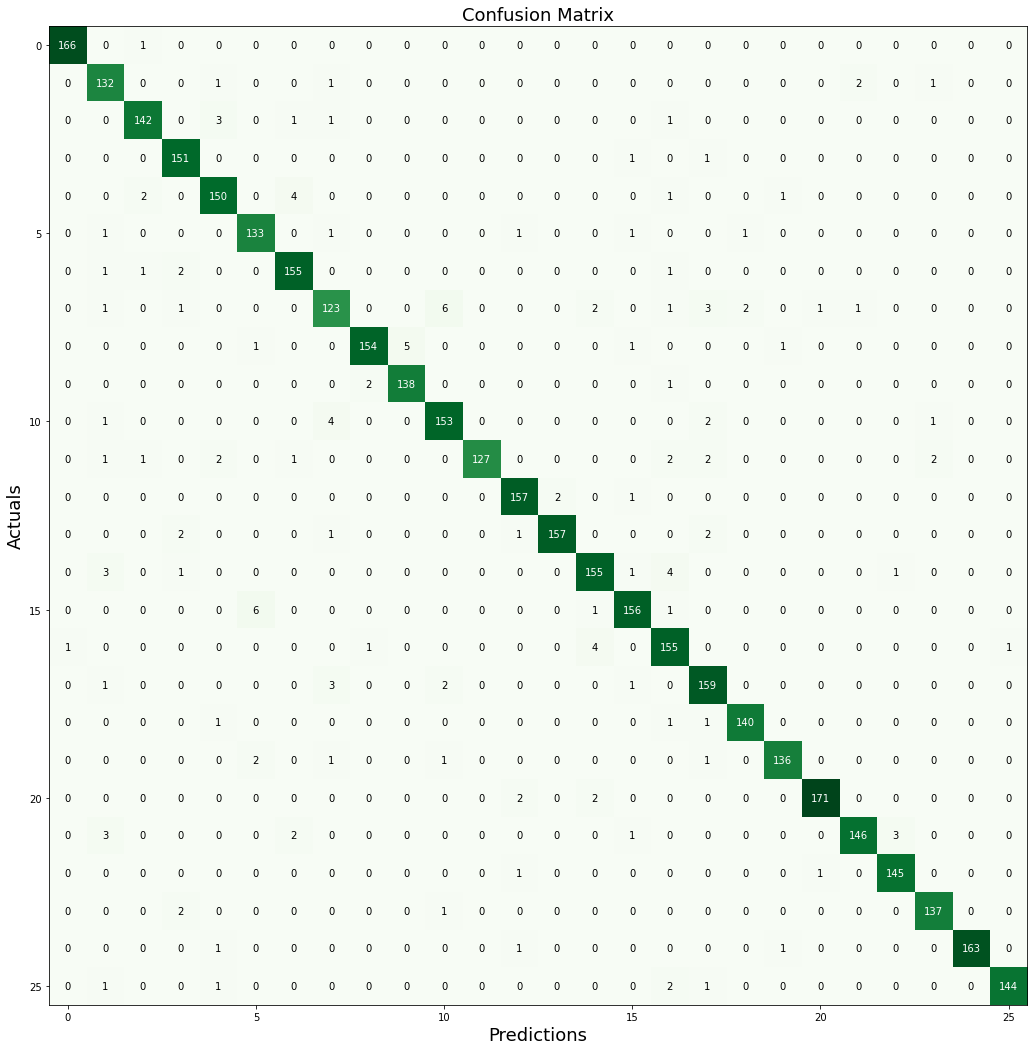

In [18]:
letter_recognition_dataSet = pd.read_csv('letter-recognition/letter-recognition.data')
X = letter_recognition_dataSet.iloc[:,1:]
Y = letter_recognition_dataSet.iloc[:,0:1]
r,c=18,18
doIt(X,Y,"Letter Recognition")

## German 

In [34]:
german_dataSet = pd.read_csv('german/german_credit_data.csv',sep=',')
german_dataSet.head()
# X = german_dataSet.iloc[:,:-1]
# Y = german_dataSet.iloc[:,-1:]
# X = X.dropna()
# Y = Y.dropna()
# doIt(X,Y,"German")

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,male,2,own,NaN,little,1169,6,radio/TV
1,1,22,female,2,own,little,moderate,5951,48,radio/TV
2,2,49,male,1,own,little,NaN,2096,12,education
3,3,45,male,2,free,little,little,7882,42,furniture/equipment
4,4,53,male,2,free,little,little,4870,24,car


## Wine Quality (Red and White)
Several of the attributes may be correlated, thus it makes sense to apply some sort of feature selection.
We are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

### Red Wine



Statistics forletter_recognition_dataSet
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min  

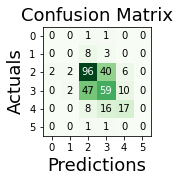

In [39]:
red_wine_quality_dataSet = pd.read_csv('wine/winequality-red.csv',sep=';')
X = red_wine_quality_dataSet.iloc[:,:-1]
Y = red_wine_quality_dataSet.iloc[:,-1:]
r,c = 2,2
doIt(X,Y,"Red Wine")

### White Wine



Statistics forletter_recognition_dataSet
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4898.000000       4898.000000  4898.000000     4898.000000   
mean        6.854788          0.278241     0.334192        6.391415   
std         0.843868          0.100795     0.121020        5.072058   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4898.000000          4898.000000           4898.000000  4898.000000   
mean      0.045772            35.308085            138.360657     0.994027   
std       0.021848            17.007137             42.498065     0.002991   
min  

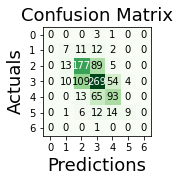

In [40]:
white_wine_quality_dataSet = pd.read_csv('wine/winequality-white.csv',sep=';')
X = white_wine_quality_dataSet.iloc[:,:-1]
Y = white_wine_quality_dataSet.iloc[:,-1:]
r,c = 2,2
doIt(X,Y,"White Wine")

## Student Data (Maths and Portuguese) 
Student info and their performance in both the subjects. Grades G1, G2, and G3.

### Maths (G1,G2,G3)

In [33]:
student_data_math = pd.read_csv('student/student-mat.csv',sep=';')
# r,c = 10,10
# #for G1
# X = student_data_math.iloc[:,:-3]
# Y = student_data_math.iloc[:,-3:-2]
# print('\033[1m' + '\n\nGrade G1' + '\033[0m')
# doIt(X,Y,"Student Grade G1")


# #for G2
# Y = student_data_math.iloc[:,-2:-1]
# print('\033[1m' + '\n\nGrade G2' + '\033[0m')
# doIt(X,Y,"Student Grade G2")

# #for G3
# Y = student_data_math.iloc[:,-1:]
# print('\033[1m' + '\n\nGrade G3' + '\033[0m')
# doIt(X,Y,,"Student Grade G3")

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
390,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
391,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
392,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
393,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


### Portuguese (G1,G2,G3)



Grade G1


Statistics for Student Grade G1
       school  sex         age address famsize Pstatus        Medu  \
count     649  649  649.000000     649     649     649  649.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      423  383         NaN     452     457     569         NaN   
mean      NaN  NaN   16.744222     NaN     NaN     NaN    2.514638   
std       NaN  NaN    1.218138     NaN     NaN     NaN    1.134552   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    2.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob  ... higher internet  romantic      famrel  \
count   649.000000    649    649  .

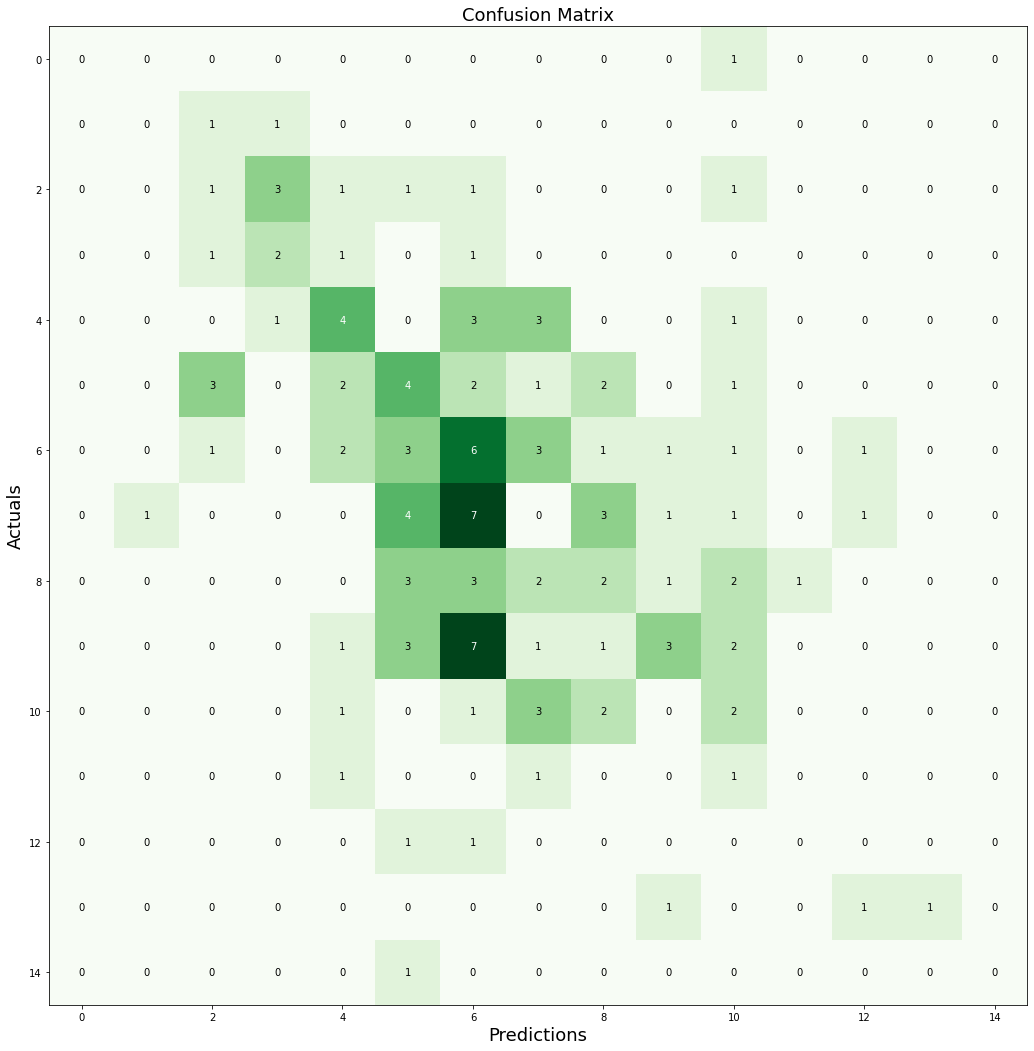



Decision Tree
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         8
         5.0       0.18      0.40      0.25         5
         6.0       0.15      0.17      0.16        12
         7.0       0.21      0.20      0.21        15
         8.0       0.18      0.16      0.17        19
         9.0       0.17      0.22      0.20        18
        10.0       0.13      0.14      0.14        14
        11.0       0.09      0.06      0.07        18
        12.0       0.00      0.00      0.00         9
        13.0       0.00      0.00      0.00         3
        14.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         3
        16.0       0.00      0.00      0.00         1

    accuracy                           0.13       130
   macro a

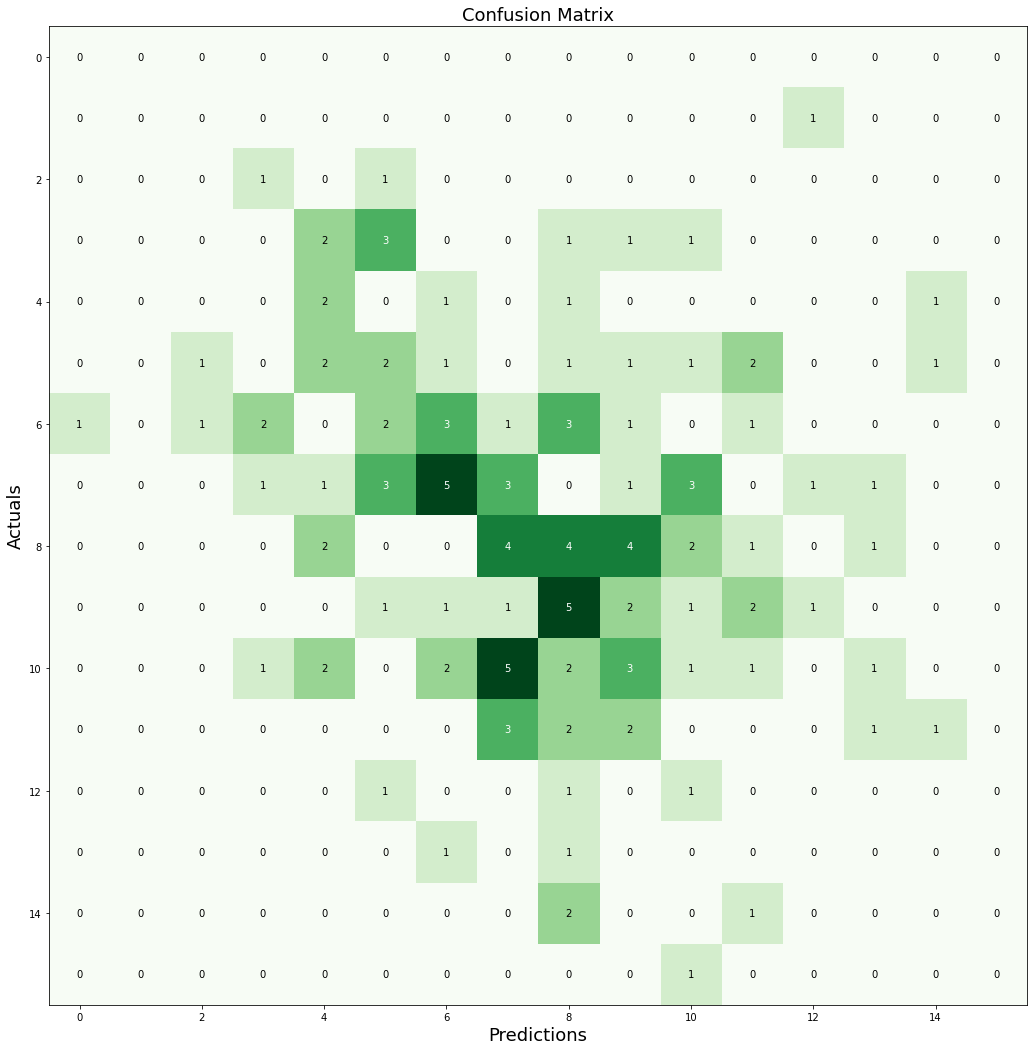



Nearest Neighbour
              precision    recall  f1-score   support

         1.0       0.00      0.00      0.00         0
         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         8
         5.0       0.00      0.00      0.00         5
         6.0       0.15      0.17      0.16        12
         7.0       0.06      0.13      0.09        15
         8.0       0.22      0.26      0.24        19
         9.0       0.18      0.11      0.14        18
        10.0       0.20      0.14      0.17        14
        11.0       0.50      0.17      0.25        18
        12.0       1.00      0.11      0.20         9
        13.0       0.00      0.00      0.00         3
        14.0       0.00      0.00      0.00         2
        15.0       0.00      0.00      0.00         3
        16.0       0.00      0.00      0.00         1

    accuracy                           0.13       130
   mac

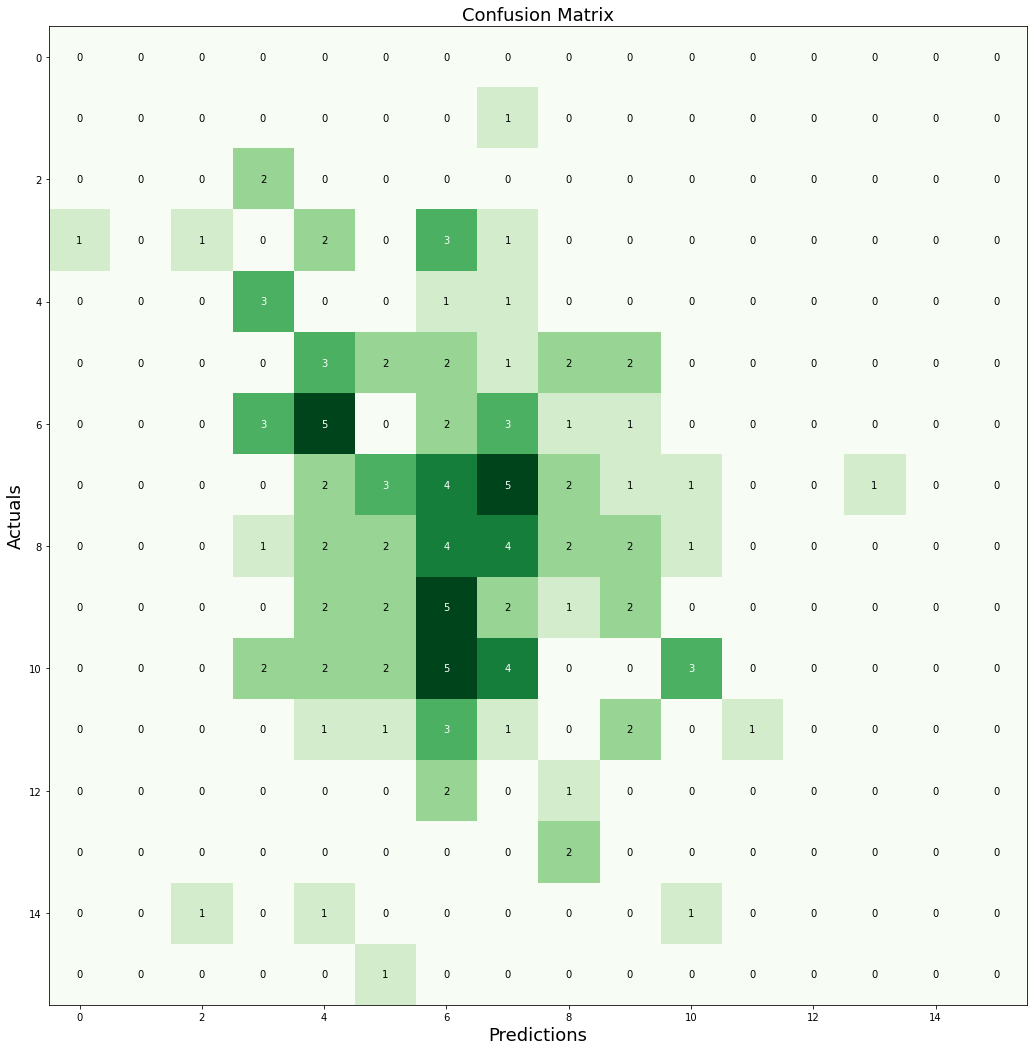



Random Forest G1
              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         2
         4.0       0.00      0.00      0.00         8
         5.0       0.08      0.20      0.12         5
         6.0       0.25      0.25      0.25        12
         7.0       0.12      0.20      0.15        15
         8.0       0.23      0.32      0.27        19
         9.0       0.06      0.06      0.06        18
        10.0       0.29      0.29      0.29        14
        11.0       0.14      0.11      0.12        18
        12.0       0.00      0.00      0.00         9
        13.0       0.00      0.00      0.00         3
        14.0       1.00      0.50      0.67         2
        15.0       0.00      0.00      0.00         3
        16.0       0.00      0.00      0.00         1

    accuracy                           0.16       130
   macro avg       0.14      0.13      0.13       130
weighte

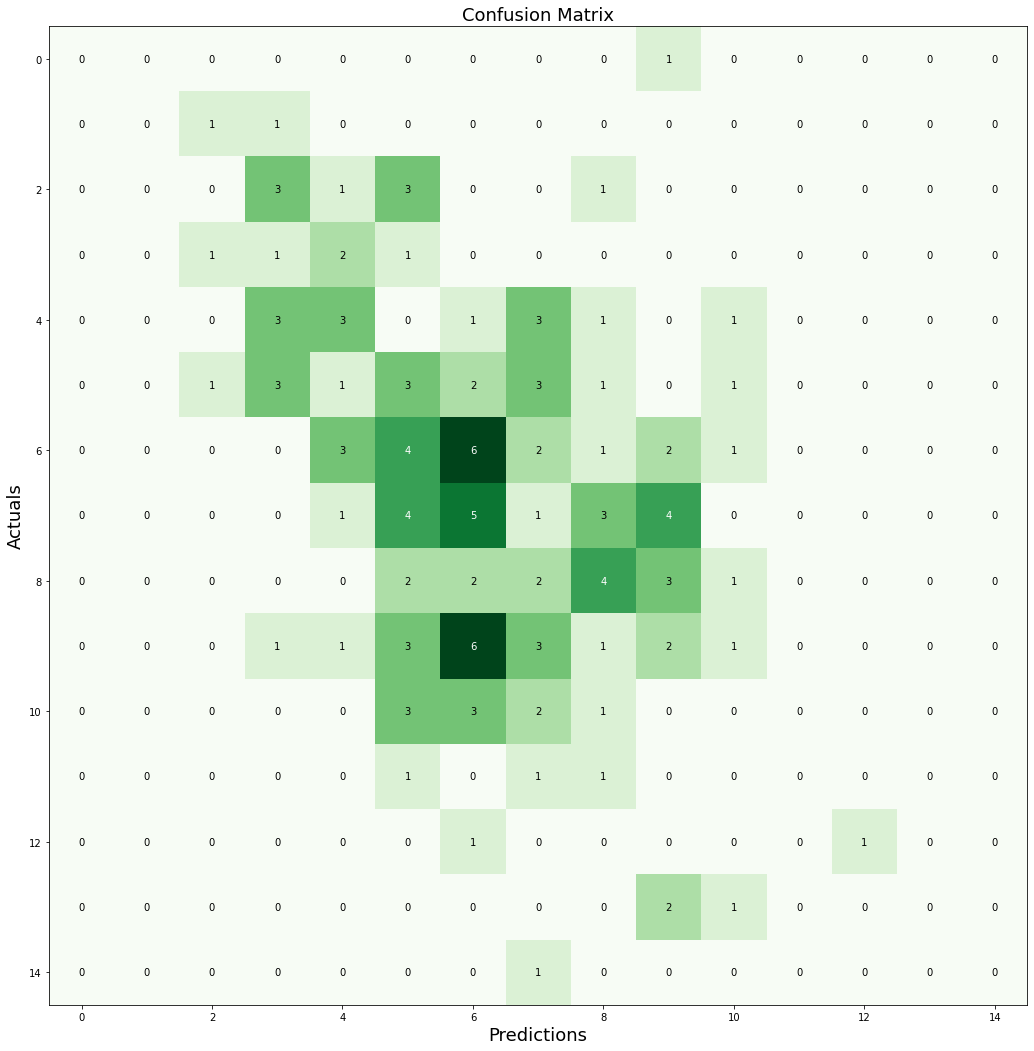



Grade G2


Statistics for Student Grade G2
       school  sex         age address famsize Pstatus        Medu  \
count     649  649  649.000000     649     649     649  649.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      423  383         NaN     452     457     569         NaN   
mean      NaN  NaN   16.744222     NaN     NaN     NaN    2.514638   
std       NaN  NaN    1.218138     NaN     NaN     NaN    1.134552   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    2.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob  ... higher internet  romantic      famrel  \
count   649.000000    649    649  .

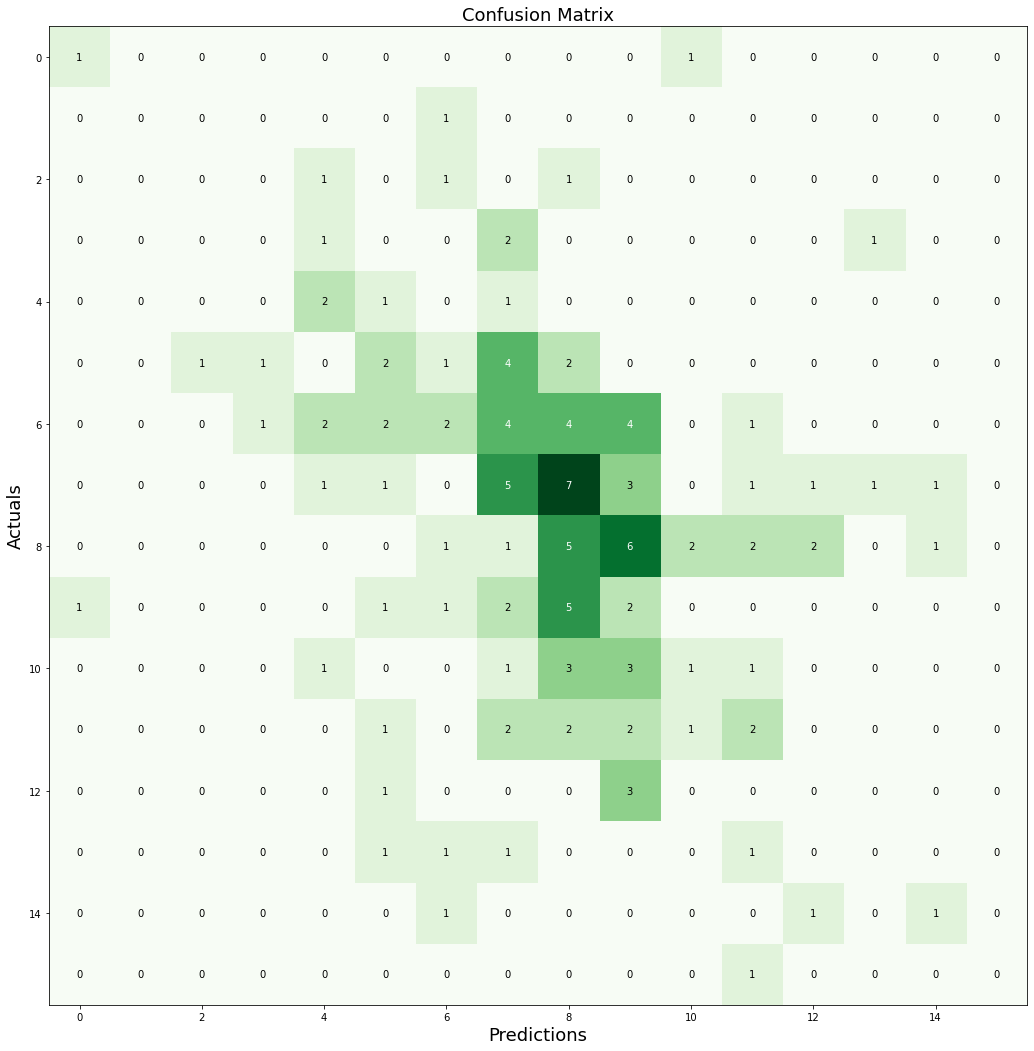



Decision Tree
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         4
         4.0       0.00      0.00      0.00         4
         5.0       0.23      0.27      0.25        11
         6.0       0.23      0.15      0.18        20
         7.0       0.05      0.05      0.05        21
         8.0       0.20      0.25      0.22        20
         9.0       0.14      0.17      0.15        12
        10.0       0.08      0.10      0.09        10
        11.0       0.12      0.10      0.11        10
        12.0       0.00      0.00      0.00         4
        13.0       0.25      0.25      0.25         4
        14.0       0.20      0.33      0.25         3
        15.0       0.00      0.00      0.00         1

    accuracy                           0.14       130
   macro a

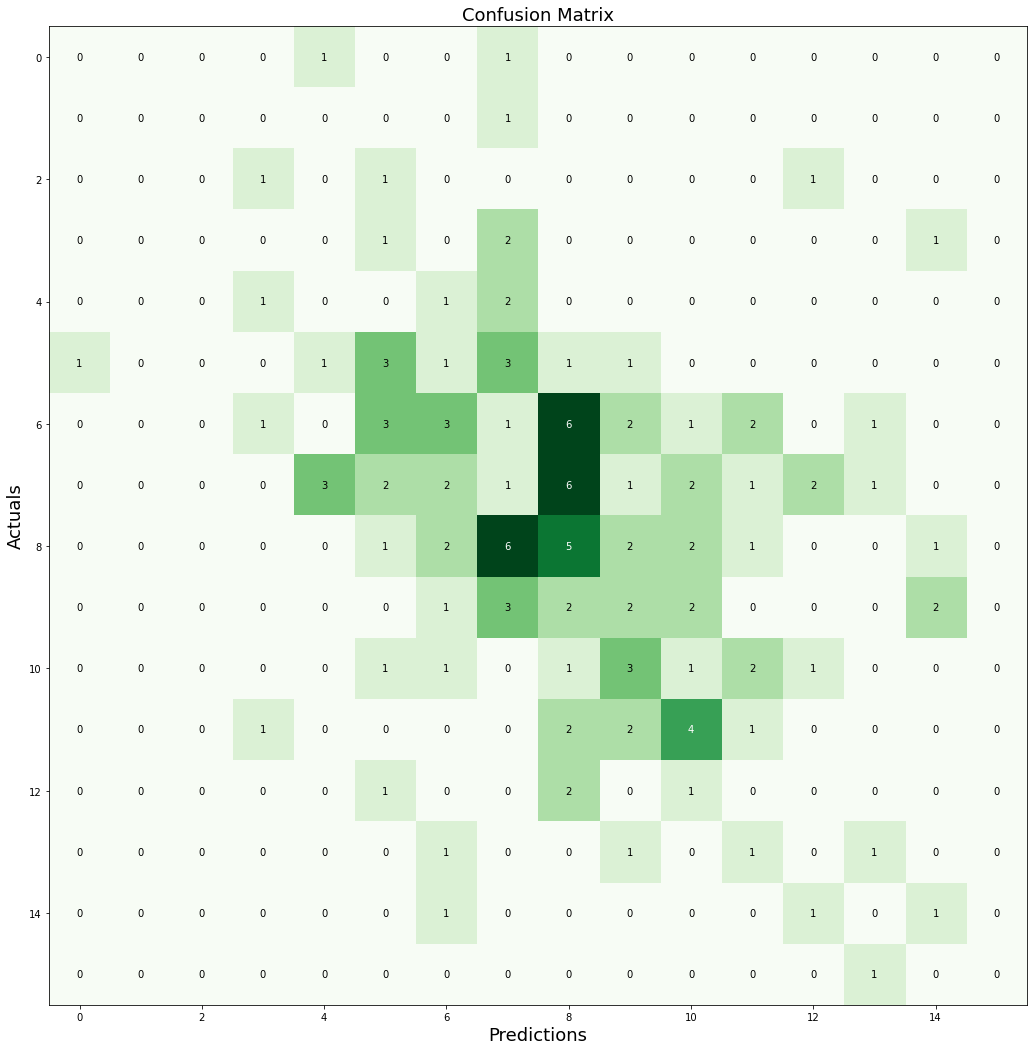



Nearest Neighbour
              precision    recall  f1-score   support

         0.0       0.50      0.50      0.50         2
         1.0       0.00      0.00      0.00         1
         2.0       0.33      0.33      0.33         3
         3.0       0.00      0.00      0.00         4
         4.0       0.05      0.25      0.09         4
         5.0       0.14      0.27      0.18        11
         6.0       0.25      0.20      0.22        20
         7.0       0.21      0.19      0.20        21
         8.0       0.30      0.35      0.33        20
         9.0       0.08      0.08      0.08        12
        10.0       0.00      0.00      0.00        10
        11.0       0.33      0.10      0.15        10
        12.0       0.00      0.00      0.00         4
        13.0       0.00      0.00      0.00         4
        14.0       0.00      0.00      0.00         3
        15.0       0.00      0.00      0.00         1

    accuracy                           0.18       130
   mac

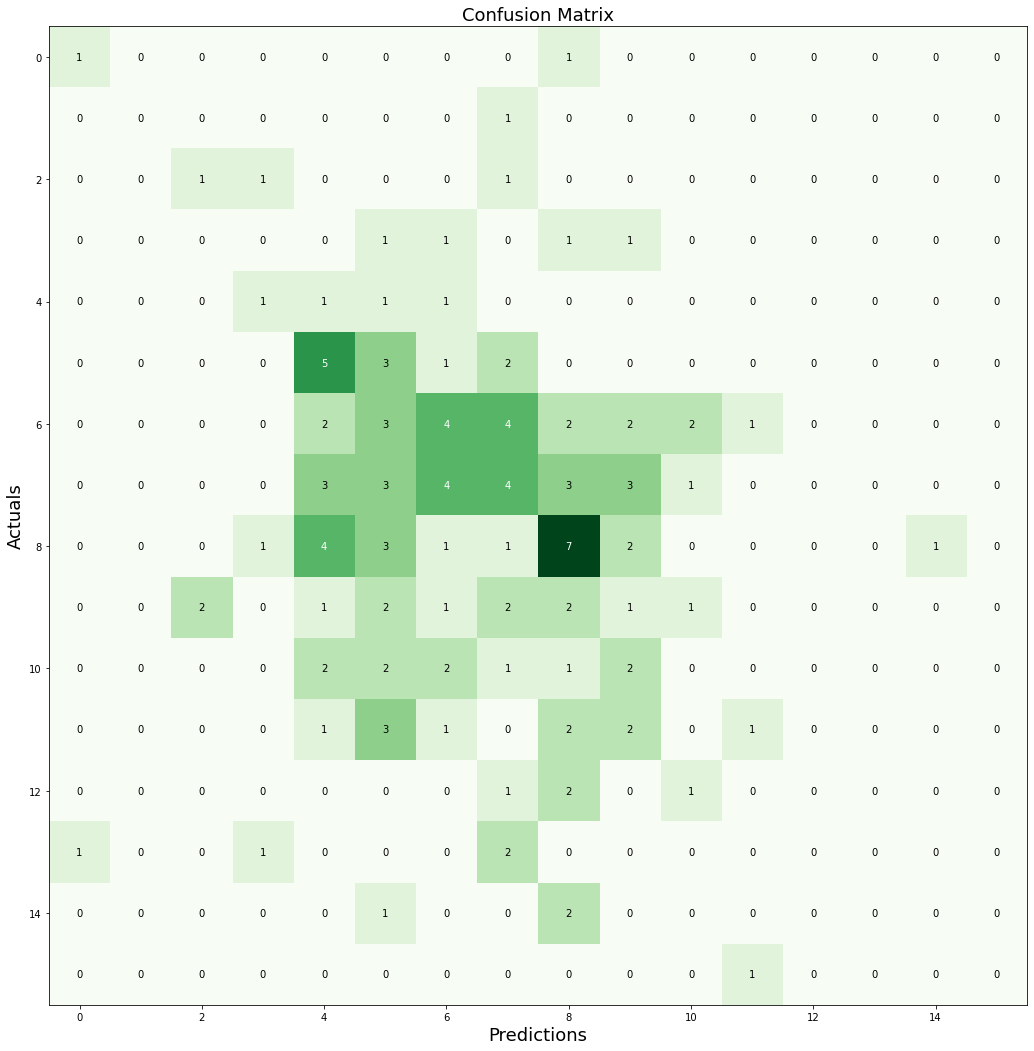



Random Forest G1
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         2
         1.0       0.00      0.00      0.00         1
         2.0       0.00      0.00      0.00         3
         3.0       0.00      0.00      0.00         4
         4.0       0.25      0.50      0.33         4
         5.0       0.30      0.55      0.39        11
         6.0       0.23      0.15      0.18        20
         7.0       0.05      0.05      0.05        21
         8.0       0.17      0.20      0.18        20
         9.0       0.16      0.33      0.22        12
        10.0       0.00      0.00      0.00        10
        11.0       0.00      0.00      0.00        10
        12.0       0.00      0.00      0.00         4
        13.0       0.00      0.00      0.00         4
        14.0       1.00      0.33      0.50         3
        15.0       0.00      0.00      0.00         1

    accuracy                           0.16       130
   macr

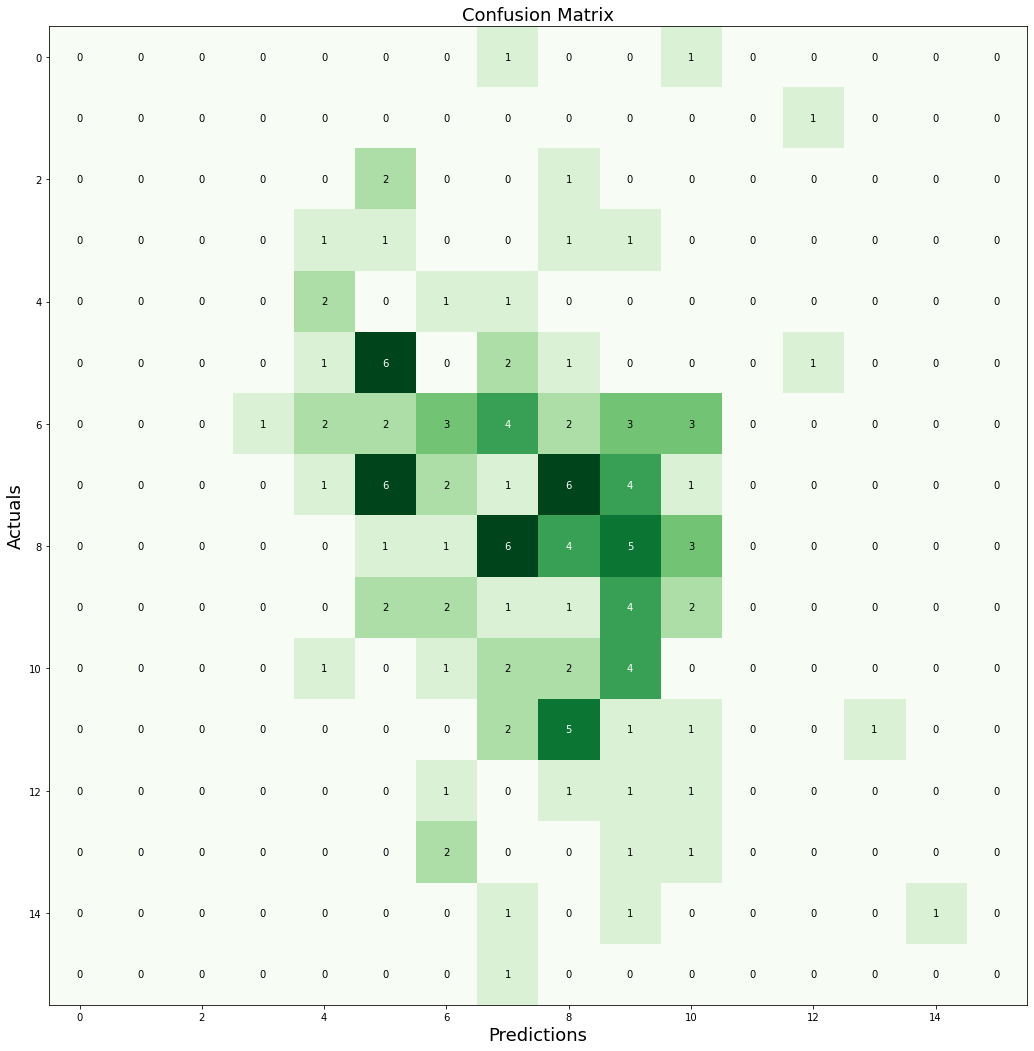



Grade G3


Statistics for Student Grade G3
       school  sex         age address famsize Pstatus        Medu  \
count     649  649  649.000000     649     649     649  649.000000   
unique      2    2         NaN       2       2       2         NaN   
top        GP    F         NaN       U     GT3       T         NaN   
freq      423  383         NaN     452     457     569         NaN   
mean      NaN  NaN   16.744222     NaN     NaN     NaN    2.514638   
std       NaN  NaN    1.218138     NaN     NaN     NaN    1.134552   
min       NaN  NaN   15.000000     NaN     NaN     NaN    0.000000   
25%       NaN  NaN   16.000000     NaN     NaN     NaN    2.000000   
50%       NaN  NaN   17.000000     NaN     NaN     NaN    2.000000   
75%       NaN  NaN   18.000000     NaN     NaN     NaN    4.000000   
max       NaN  NaN   22.000000     NaN     NaN     NaN    4.000000   

              Fedu   Mjob   Fjob  ... higher internet  romantic      famrel  \
count   649.000000    649    649  .

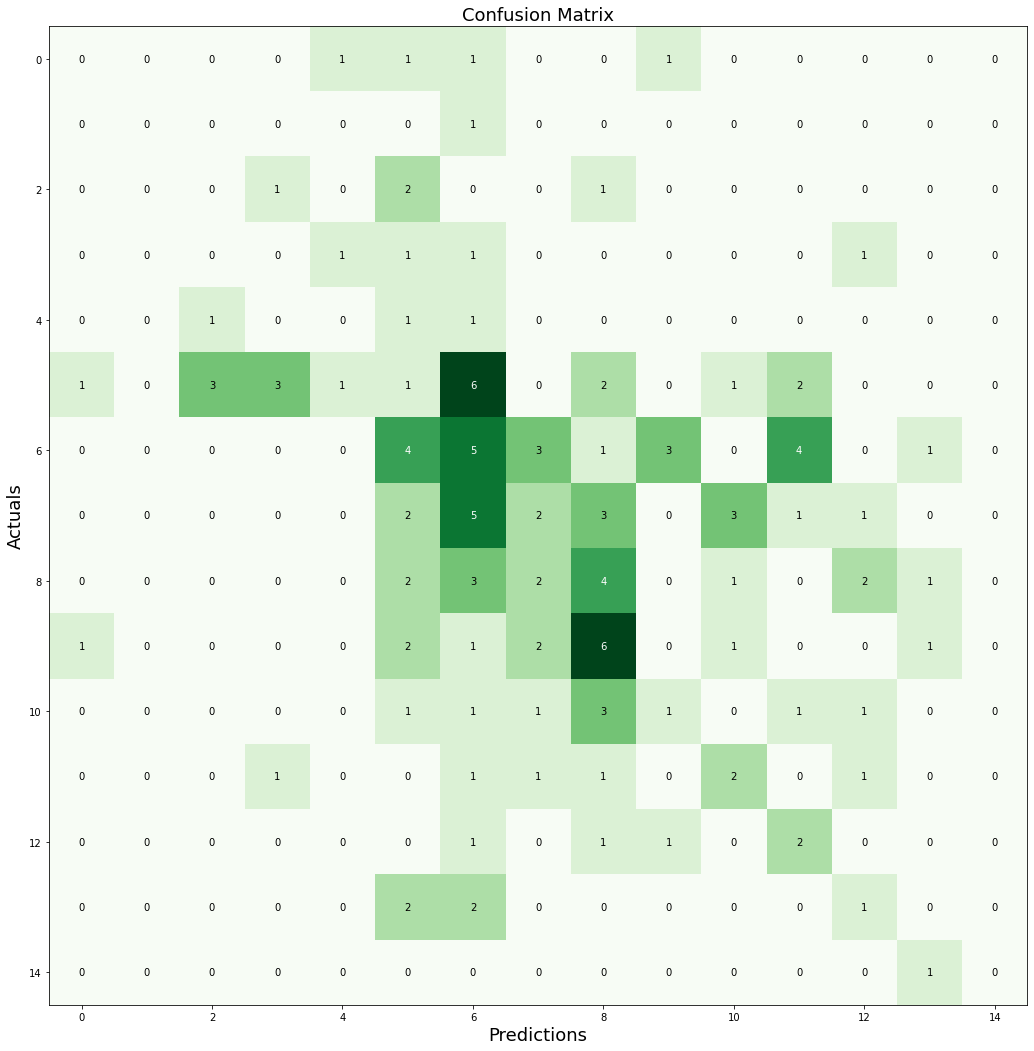



Decision Tree
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         4
         2.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         4
         5.0       0.11      0.25      0.15         4
         6.0       0.14      0.33      0.20         3
         7.0       0.33      0.25      0.29        20
         8.0       0.07      0.05      0.06        21
         9.0       0.09      0.12      0.10        17
        10.0       0.23      0.40      0.29        15
        11.0       0.00      0.00      0.00        14
        12.0       0.17      0.11      0.13         9
        13.0       0.09      0.14      0.11         7
        14.0       0.25      0.20      0.22         5
        15.0       0.00      0.00      0.00         5
        16.0       0.00      0.00      0.00         1

    accuracy                           0.15       130
   macro a

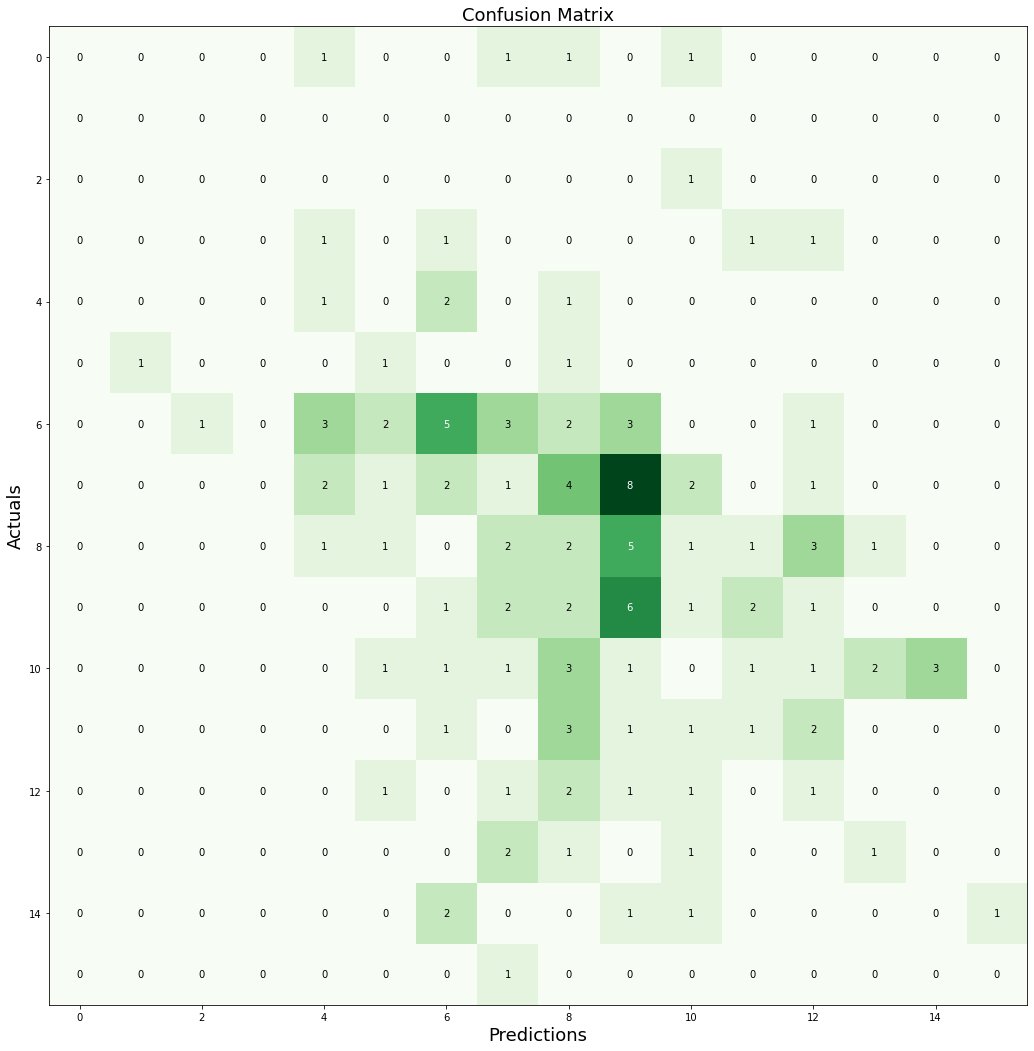



Nearest Neighbour
              precision    recall  f1-score   support

         0.0       0.14      0.25      0.18         4
         1.0       0.00      0.00      0.00         0
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         3
         7.0       0.28      0.35      0.31        20
         8.0       0.27      0.33      0.30        21
         9.0       0.20      0.12      0.15        17
        10.0       0.16      0.20      0.18        15
        11.0       0.00      0.00      0.00        14
        12.0       0.00      0.00      0.00         9
        13.0       0.00      0.00      0.00         7
        14.0       0.00      0.00      0.00         5
        15.0       0.00      0.00      0.00         5
        16.0       0.00      0.00      0.00         1

    accuracy                           0.15       130
   mac

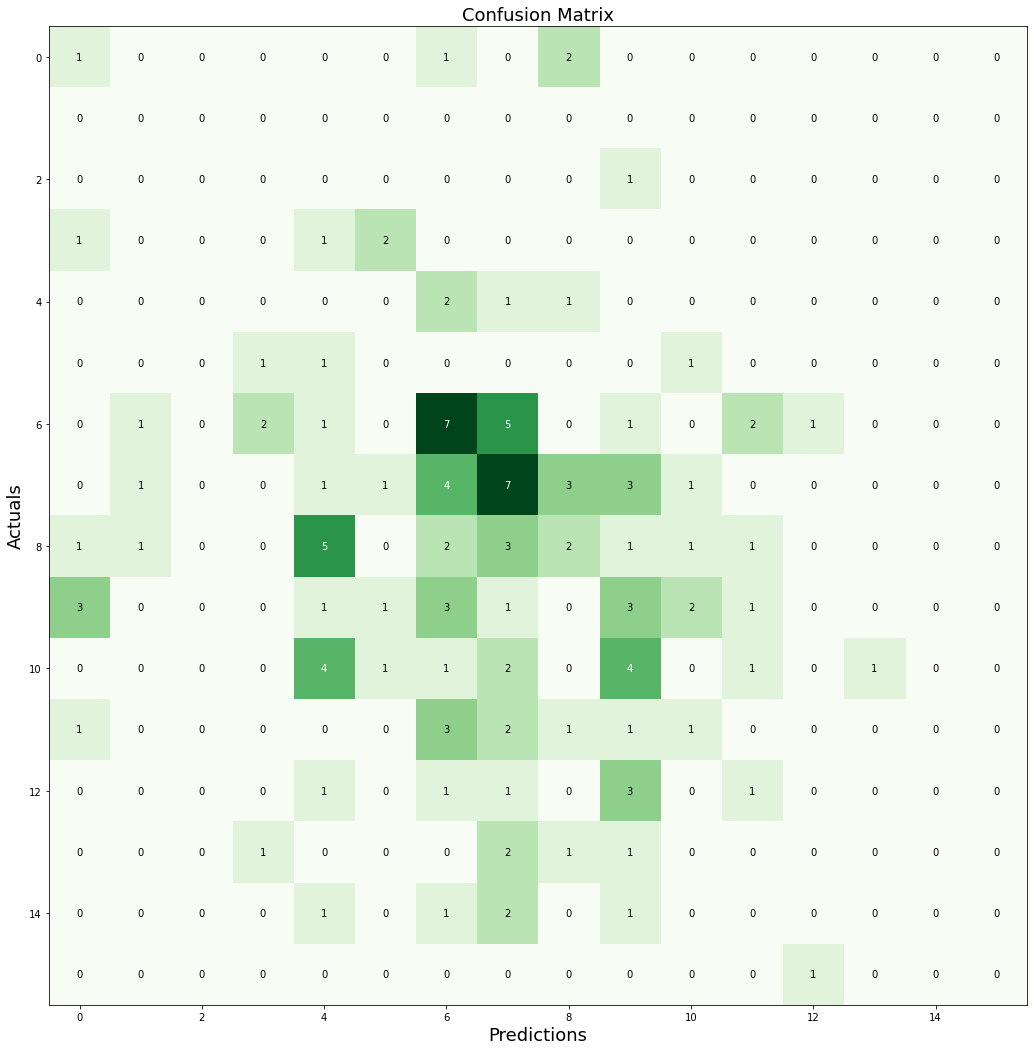



Random Forest G1
              precision    recall  f1-score   support

         0.0       1.00      0.25      0.40         4
         3.0       0.00      0.00      0.00         1
         4.0       0.00      0.00      0.00         4
         5.0       0.00      0.00      0.00         4
         6.0       0.00      0.00      0.00         3
         7.0       0.23      0.35      0.28        20
         8.0       0.17      0.24      0.20        21
         9.0       0.20      0.12      0.15        17
        10.0       0.13      0.27      0.17        15
        11.0       0.00      0.00      0.00        14
        12.0       0.00      0.00      0.00         9
        13.0       0.25      0.14      0.18         7
        14.0       0.20      0.20      0.20         5
        15.0       0.00      0.00      0.00         5
        16.0       0.00      0.00      0.00         1

    accuracy                           0.16       130
   macro avg       0.15      0.10      0.11       130
weighte

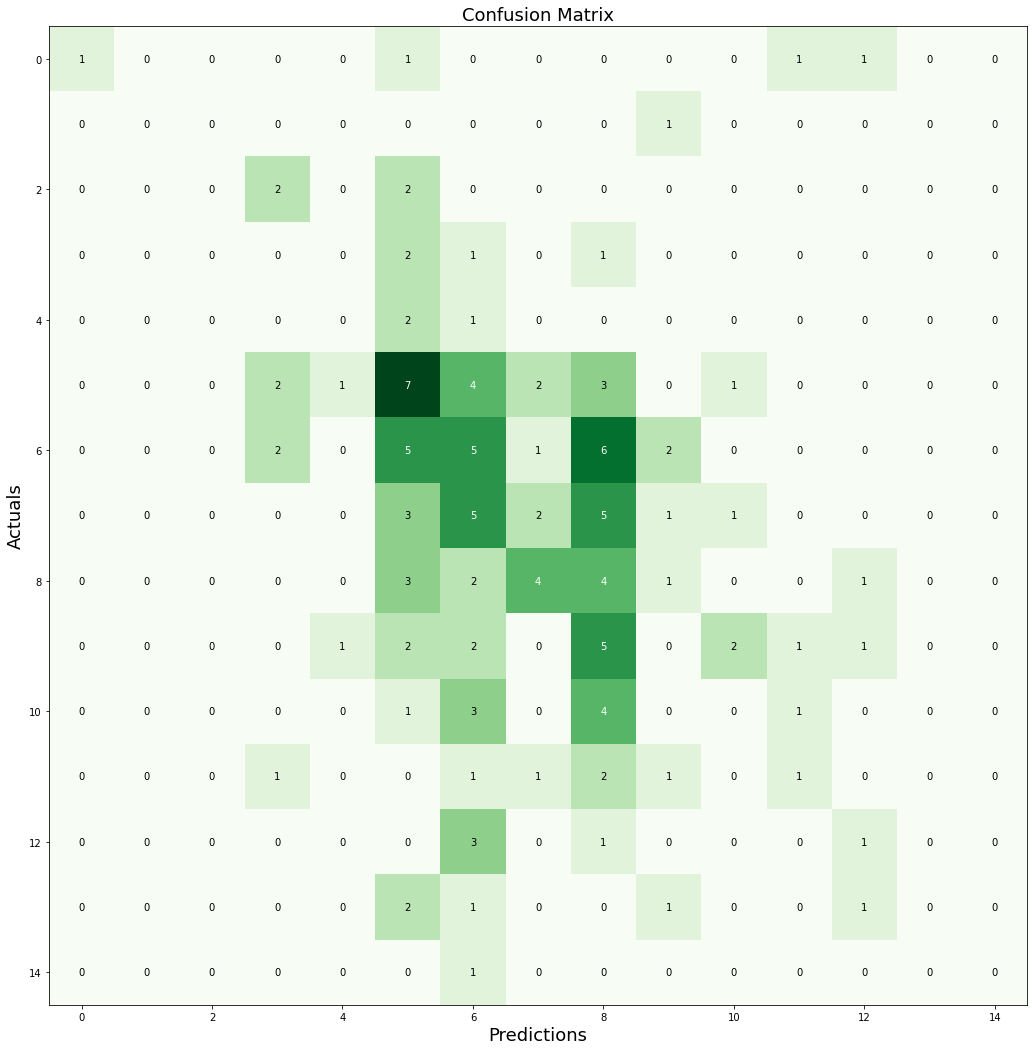

In [29]:
student_data_portuguese = pd.read_csv('student/student-por.csv',sep=';')
X = student_data_portuguese.iloc[:,:-3]
Y = student_data_portuguese.iloc[:,-3:-2]
print('\033[1m' + '\n\nGrade G1' + '\033[0m')
doIt(X,Y,"Student Grade G1")


#for G2
Y = student_data_portuguese.iloc[:,-2:-1]
print('\033[1m' + '\n\nGrade G2' + '\033[0m')
doIt(X,Y,"Student Grade G2")

#for G3
Y = student_data_portuguese.iloc[:,-1:]
print('\033[1m' + '\n\nGrade G3' + '\033[0m')
doIt(X,Y,"Student Grade G3")

# Following is the code for dimensionality reduction using PCA

In [52]:
encoder = OrdinalEncoder()
X = encoder.fit_transform(X)
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=4)

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

pca = PCA(n_components = 2)
 
X_train = pca.fit_transform(X_train)
X_test = pca.fit_transform(X_test)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         9
           4       0.00      0.00      0.00         1
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         2
           8       0.00      0.00      0.00         7
           9       0.00      0.00      0.00         6
          10       0.11      1.00      0.20         9
          11       0.00      0.00      0.00        10
          12       0.00      0.00      0.00         8
          13       0.00      0.00      0.00         5
          14       0.00      0.00      0.00         3
          15       0.00      0.00      0.00         7
          16       0.00      0.00      0.00         2
          17       0.00      0.00      0.00         2
          18       0.00      0.00      0.00         2
          20       0.00      0.00      0.00         1

    accuracy              

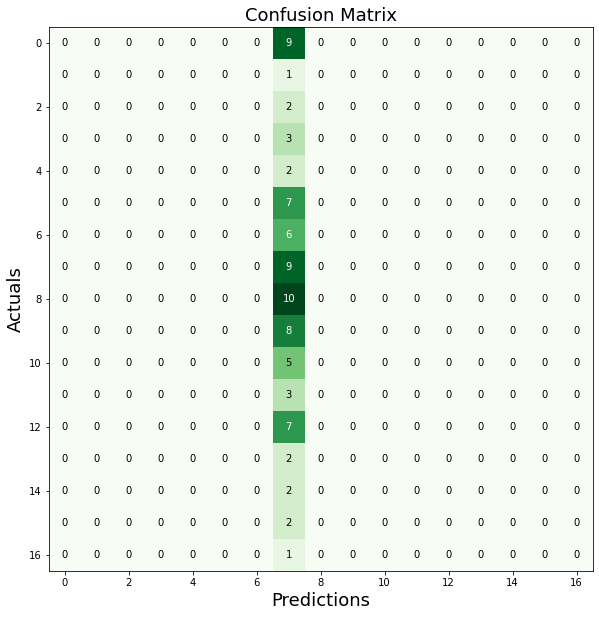

In [56]:
SVM(X_train,X_test,y_train,y_test)